In [ ]:
import pandas as pd
import re
import string
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 1.8MB 6.6MB/s 
     |████████████████████████████████| 13.9MB 303kB/s 
     |████████████████████████████████| 266kB 43.2MB/s 
     |████████████████████████████████| 276kB 42.5MB/s 
     |████████████████████████████████| 66.2MB 53kB/s 
     |████████████████████████████████| 174kB 43.6MB/s 
     |████████████████████████████████| 6.8MB 33.9MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 1.6MB 37.6MB/s 
     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 6.0MB 11.9MB/s 
     |████████████████████████████████| 153kB 37.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 163kB 42.1MB/s 
     |████████████████████████████████| 1.1MB 40.7MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  

In [ ]:
! python -m spacy download en_core_web_sm
! python -m textblob.download_corpora

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
#import nlp module
from pycaret.nlp import *

In [ ]:
#import pandas if we're gonna use a dataframe
import pandas as pd

# load the data into a dataframe
df = pd.read_csv('sample_data/CaseReferralsSheet.csv')

In [ ]:
df['Case Text']

0    To: Ms. Rose Habchi Daher \n\nAttn.: \nrosehab...
1    Statement of the problem and origin of the req...
2    Input of primary assessment of the … Family\n\...
3    CASE NOTE\n\nStatement of the problem and orig...
4    Himaya\nMansourieh Gate Center, Block B,\n2nd ...
Name: Case Text, dtype: object

In [ ]:
# initialize the setup
nlp = setup(data = df, target = 'Case Text', session_id = 493, custom_stopwords = [ 'rt', 'https', 'http', 'co', 'amp','To:','CASE NOTE'])

Description,Value
session_id,493
Documents,5
Vocab Size,528
Custom Stopwords,True


In [ ]:
# create the model
lda = create_model('lda', num_topics = 6, multi_core = True)

In [ ]:
# label the data using trained model
df_lda = assign_model(lda)

In [ ]:
df_lda.head()

,Case Number,Case Text,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,A1,rise gmail com date reference request search w...,0.001097,0.994508,0.001100,0.001097,0.001097,0.001103,Topic 1,0.99
1,B1,statement origin request child welfare alert d...,0.000838,0.000842,0.995804,0.000838,0.000838,0.000842,Topic 2,1.00
2,B2,input primary assessment family present social...,0.000409,0.997952,0.000411,0.000409,0.000409,0.000411,Topic 1,1.00
3,D1,case note statement origin assistance regard y...,0.000495,0.000498,0.000497,0.000495,0.000495,0.997522,Topic 5,1.00
4,E1,com rise write child family border assistance ...,0.000518,0.000521,0.000520,0.000518,0.000518,0.997407,Topic 5,1.00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.036158  0.140303       1        1  46.414396
1      0.012358 -0.136032       2        1  39.408223
2     -0.137956 -0.004115       3        1  14.001148
4      0.029130  0.000042       4        1   0.058744
3      0.029936 -0.000072       5        1   0.058744
0      0.030374 -0.000126       6        1   0.058744, topic_info=         Term       Freq      Total Category  logprob  loglift
13      child  55.000000  55.000000  Default  30.0000  30.0000
437    syrian  10.000000  10.000000  Default  29.0000  29.0000
51     mother  26.000000  26.000000  Default  28.0000  28.0000
463     carer   9.000000   9.000000  Default  27.0000  27.0000
93    address  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
181      stay   0.001584   7.232338   Topic6  -6.2615  -0.9866
350      wife   0.001584   6.539508   Topic6  -6.2617  -0.8861
281      name   0.001583   7.422778   Topic6  -6.2619  -1.0129
20   daughter   0.001583   9.185067   Topic6  -6.2624  -1.2265
19       date   0.001582   5.445524   Topic6  -6.2627  -0.7041

[418 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
354       1  0.981670    abuse
0         1  0.308826   accord
0         2  0.617652   accord
92        3  0.907783   addict
93        1  0.955250  address
...     ...       ...      ...
89        2  0.460353    would
90        1  0.453549     year
90        2  0.362839     year
90        3  0.272130     year
199       3  0.907782    youth

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 3, 5, 4, 1])

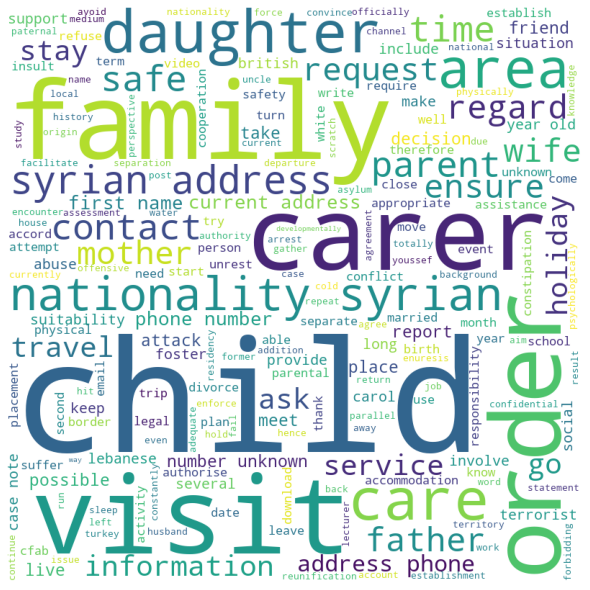

In [ ]:
plot_model(lda, plot='topic_distribution')
plot_model(lda, plot='topic_model')
plot_model(lda, plot='wordcloud', topic_num = 'Topic 5')
plot_model(lda, plot='frequency', topic_num = 'Topic 5')
plot_model(lda, plot='bigram', topic_num = 'Topic 5')
plot_model(lda, plot='trigram', topic_num = 'Topic 5')
plot_model(lda, plot='distribution', topic_num = 'Topic 5')
plot_model(lda, plot='sentiment', topic_num = 'Topic 5')
plot_model(lda, plot='tsne')

In [ ]:
plot_model(lda,plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.036158  0.140303       1        1  46.414391
1      0.012358 -0.136032       2        1  39.408227
2     -0.137956 -0.004115       3        1  14.001149
4      0.029130  0.000042       4        1   0.058744
3      0.029936 -0.000072       5        1   0.058744
0      0.030374 -0.000126       6        1   0.058744, topic_info=         Term       Freq      Total Category  logprob  loglift
13      child  55.000000  55.000000  Default  30.0000  30.0000
437    syrian  10.000000  10.000000  Default  29.0000  29.0000
51     mother  26.000000  26.000000  Default  28.0000  28.0000
463     carer   9.000000   9.000000  Default  27.0000  27.0000
93    address  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
181      stay   0.001584   7.232338   Topic6  -6.2615  -0.9866
350      wife   0.001584   6.539508   Topic6  -6.2617  -0.8861
281      name   0.001583   7.422777   Topic6  -6.2619  -1.0129
20   daughter   0.001583   9.185066   Topic6  -6.2624  -1.2265
19       date   0.001582   5.445524   Topic6  -6.2627  -0.7041

[418 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
354       1  0.981670    abuse
0         1  0.308826   accord
0         2  0.617652   accord
92        3  0.907783   addict
93        1  0.955250  address
...     ...       ...      ...
89        2  0.460353    would
90        1  0.453549     year
90        2  0.362839     year
90        3  0.272130     year
199       3  0.907782    youth

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 3, 5, 4, 1])

In [ ]:
 evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…